In [94]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [95]:
import numpy as np
import pandas as pd

In [96]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [97]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [98]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [99]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [100]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [101]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [102]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [103]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [144]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from sqlalchemy import inspect
## Get the column names of the table measurement and the column datatypes.
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column)


## Perform time manipulations to calculate the last tweleve months from the latest date in the dataset.
import datetime
import timestring

latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print("latest_date=", latest_date)
start_date=timestring.Date(latest_date).date
print("start_date=",start_date)
print(datetime.timedelta(days=366))
lasttwelve=start_date-datetime.timedelta(days=366)
print("lasttwelve=", lasttwelve)


# Initialise two lists for date and precipitation values and build a dataframe.
precipitation=[]
date=[]

### Gather data in between two dates
getdata= session.query(Measurement.id, Measurement.prcp, Measurement.date, Measurement.tobs, Measurement.station).\
filter(Measurement.date.between(lasttwelve,start_date))

## creating the two lists- which will be used to initialise the dataframe.
date = [result[2] for result in getdata]
precipitation = [result[1] for result in getdata]

temperature=[result[3] for result in getdata]
    

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
latest_date= 2017-08-23
start_date= 2017-08-23 00:00:00
366 days, 0:00:00
lasttwelve= 2016-08-22 00:00:00


In [105]:
##creating the dataframe for date and precipitation 
## Set index to date.

dataframe_dict={'Date': date, 'Precipitation':precipitation}
dataframe_precipitation=pd.DataFrame(dataframe_dict)
dataframe_precipitation=dataframe_precipitation.set_index('Date')
dataframe_precipitation.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [106]:
### Sort the dataframe by date in descending order
#DataFrame.sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort' - syntax for reference.
dataframe_precipitation_desc=dataframe_precipitation.sort_values(by=['Date'], ascending=False)
dataframe_precipitation_desc.head(10)

,Precipitation
Date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-22,0.00
2017-08-21,0.56
2017-08-21,0.02


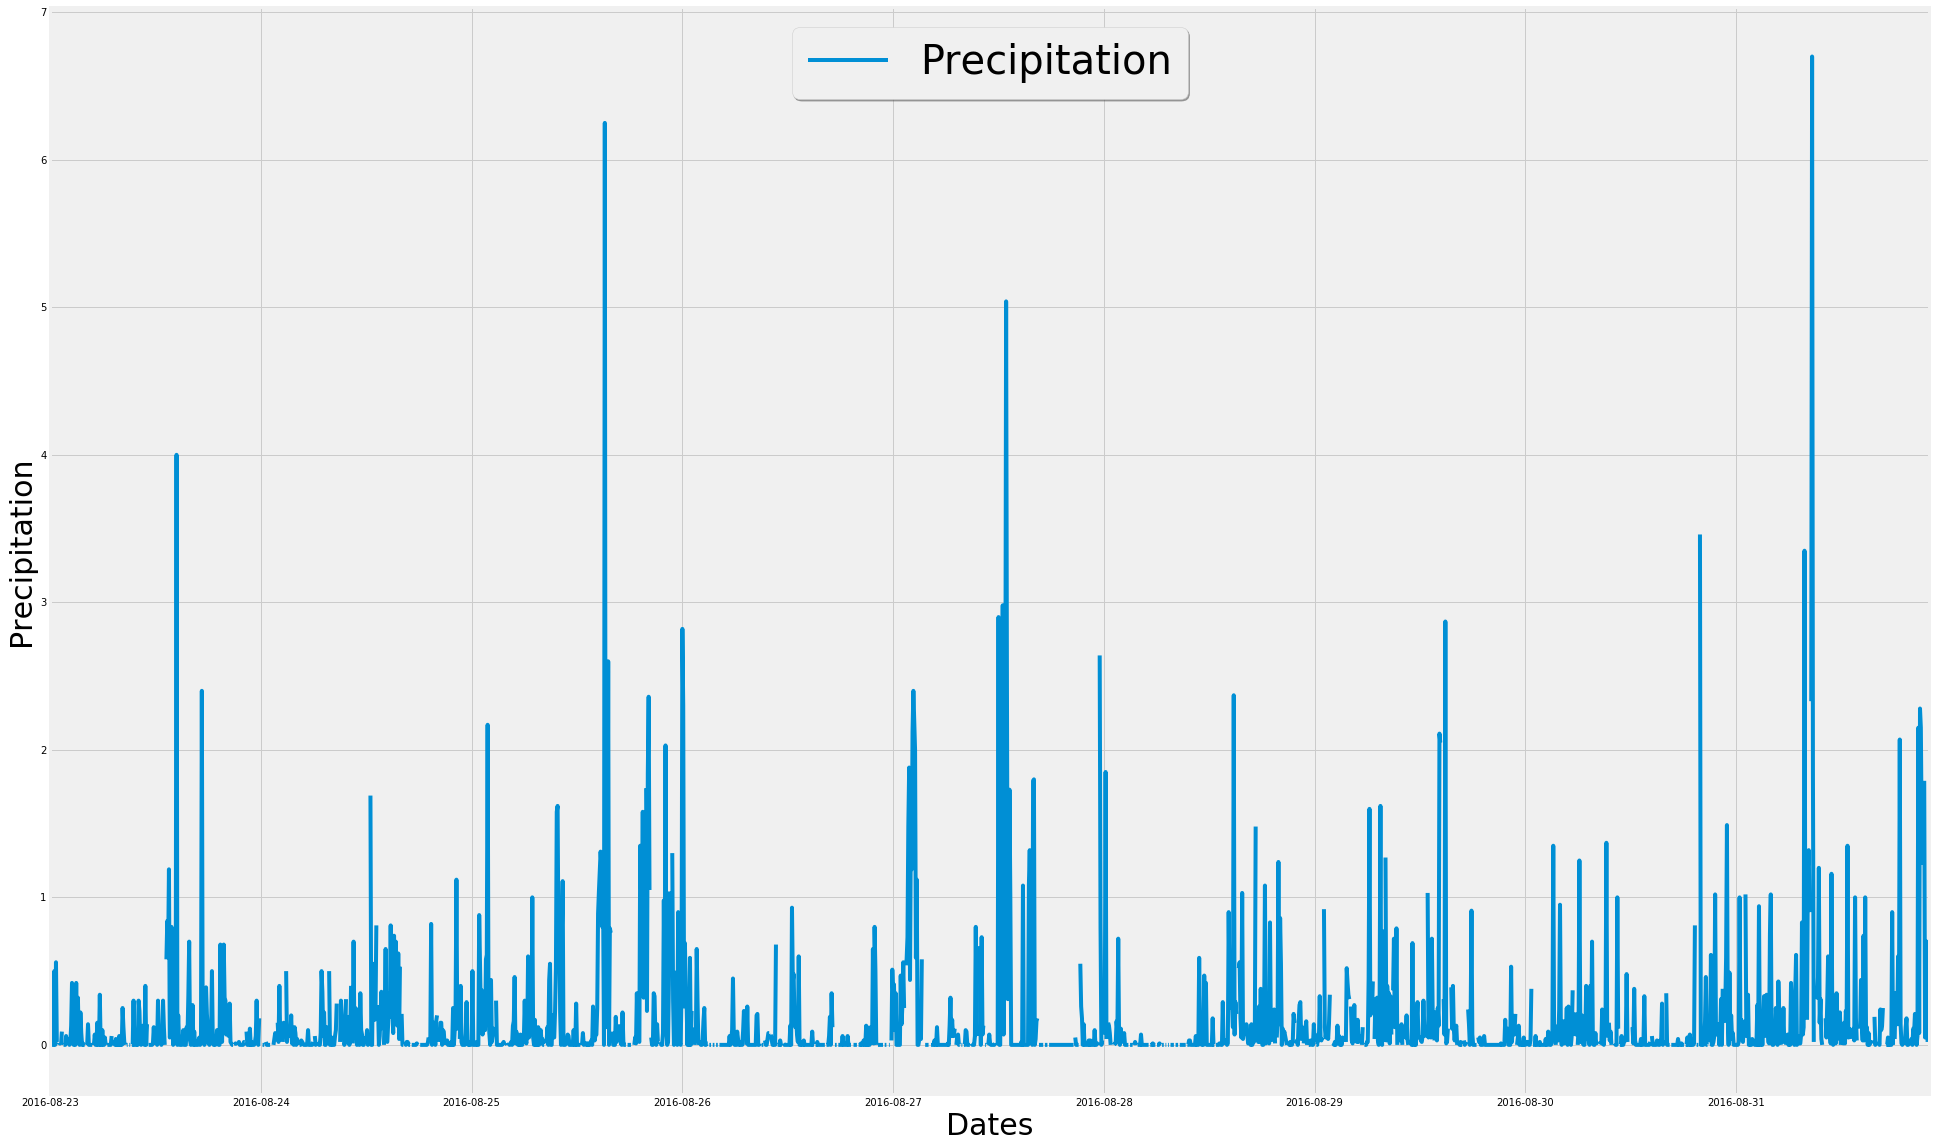

In [107]:
### Plotting using dataframe plots and adjusting legend size. 
###Also making sure the date xticks dont crowd and make it look ugly.

import matplotlib.pyplot as plt
%matplotlib inline

ax = dataframe_precipitation_desc.plot(figsize=(30, 20))
ax.set_xticklabels( date, rotation=0)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0 ), shadow=True, fontsize=40)
plt.ylabel("Precipitation", fontsize=30)
plt.xlabel("Dates", fontsize=30)
plt.show()


In [108]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Syntax- DataFrame.describe(self, percentiles=None, include=None, exclude=None)[source]
dataframe_precipitation_desc.describe(percentiles=None, include=None, exclude=None)

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [109]:
# Design a query to show how many stations are available in this dataset?

station_result=session.query(Station)
print("Number of stations available in Station datasets=", station_result.count())


Number of stations available in Station datasets= 9


In [110]:
# What are the most active stations? (i.e. what stations have the most rows)?

## Implementation with SQL statement

stmt="SELECT station, count(station) FROM measurement group by station order by count(station) desc;"
station_result = pd.read_sql_query(stmt, session.bind)
print(station_result.values)

## Implementation from sqlalchemy session

from sqlalchemy import func
stations_busy=session.query((Measurement.station), func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
stations_busy


[['USC00519281' 2772]
 ['USC00519397' 2724]
 ['USC00513117' 2709]
 ['USC00519523' 2669]
 ['USC00516128' 2612]
 ['USC00514830' 2202]
 ['USC00511918' 1979]
 ['USC00517948' 1372]
 ['USC00518838' 511]]


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [111]:
### Check the busiest station with max number of data points and get the average, minimum
### maximum measurements from that station.

from sqlalchemy import func
busiest_station=session.query((Measurement.station), func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()

busiest_station_id=str(busiest_station[0])
print("busiest_station_id=", busiest_station_id)

## Implementation with sql statements
stmt="SELECT avg(Measurement.tobs), min(Measurement.tobs), max(Measurement.tobs) FROM measurement where station='USC00519281';"
average = pd.read_sql_query(stmt, session.bind)
print(average)

#### Implementation with session query
busy_station_stats=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station.contains(busiest_station_id)).all()
busy_station_stats
#dir(Measurement.station)


busiest_station_id= USC00519281
   avg(Measurement.tobs)  min(Measurement.tobs)  max(Measurement.tobs)
0              71.663781                   54.0                   85.0


[(54.0, 85.0, 71.66378066378067)]

In [112]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs=[]
date=[]
station_names=[]

## Get data for the last twelve months.
getdata_last_twelve_months= session.query(Measurement.date, Measurement.tobs, Measurement.station).\
filter(Measurement.date.between(lasttwelve,start_date))

#date = [result[2] for result in getdata]
date=[row[0] for row in getdata_last_twelve_months]
tobs=[row[1] for row in getdata_last_twelve_months]
station_names=[row[2] for row in getdata_last_twelve_months]

## Build a dataframe for last twleve months of data with tobs or temperature data points
tobs_dataframe_dict={'Date': date, 'Temperature':tobs, 'Station Name': station_names}
tobs_dataframe=pd.DataFrame(tobs_dataframe_dict)
# tobs_dataframe.head(10)

most_tobs=tobs_dataframe['Station Name'].value_counts().index[0]
# dir(most_tobs)
print("station with most temperature readings in last 12 months=",most_tobs)


station with most temperature readings in last 12 months= USC00519397


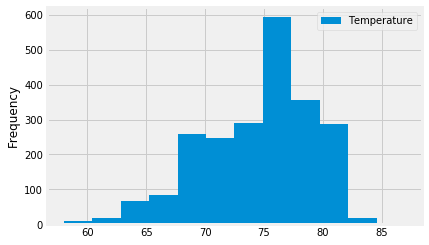

In [113]:
##Plot the results as a histogram with `bins=12`
##DataFrame.plot.hist(self, by=None, bins=10, **kwargs)

tobs_dataframe.plot.hist( by=most_tobs, bins=12)

In [114]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [141]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
start_date='2016-08-23 00:00:00'
lasttwelve='2017-08-23 00:00:00'

data=calc_temps(start_date, lasttwelve)
print(calc_temps('2012-02-28', '2012-03-05'))
print(calc_temps('2011-02-28', '2011-03-05'))

[(62.0, 69.57142857142857, 74.0)]
[(61.0, 69.75510204081633, 75.0)]


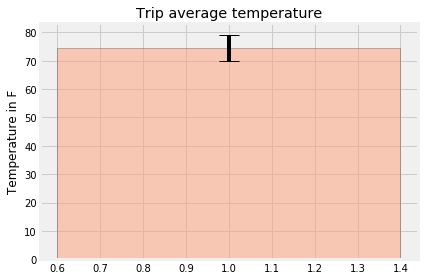

In [157]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# Build the plot


dataframe_dict_temp={'Date': date, 'Temperature':temperature}
dataframe_temperature=pd.DataFrame(dataframe_dict_temp)
dataframe_temperature=dataframe_temperature.set_index('Date')
dataframe_temperature.head(10)

import statistics

fig, ax = plt.subplots()
x=[1]
y=data[0][1]
error=statistics.stdev(temperature)
ax.bar(x, y, yerr=error, align='center', alpha=0.5, ecolor='black', color='lightsalmon',edgecolor='k',capsize=10)
ax.set_ylabel('Temperature in F')

ax.set_title('Trip average temperature')

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [117]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [118]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [119]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [120]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [121]:
# Plot the daily normals as an area plot with `stacked=False`
